In [2]:
import Models.SIRD as sird
import Models.SIRD_Time as sird_time
import Models.SIRD_Beta_Time as sird_beta

import Models.SIRD_Feedback as sird_fb

import Models.SIRD_Feedback_Delay as sird_fd

import Models.SIRD_Feedback_Delay

import Models.process as process

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [3]:
#pathc = "../Data/Italian Data/"
pathc="../Data/State Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
#filename = "National Data.csv"
filename = "CA.csv"
dates, infectRaw, recovRaw, deadRaw = process.loadData(pathc + filename)

recovRaw = process.getRecov(infectRaw, deadRaw)
infectRaw = process.getCurrentInfect(infectRaw, recovRaw, deadRaw)

pop = 60000000

skipDays = 0
numDays = len(infectRaw) #just to get initial beginning data
#asympt = asymptRaw[skipDays:numDays]
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

daysToPredict = 200

## SIRD Feedback with delay

In [79]:
sird.weightDecay= .97
sird.regularizer=10

sird_fd.weightDecay = .97 #very small amount of decay
sird_fd.regularizer = 10
sird_fd.betaUseDecay = True

sird_fd.delay = 28

In [80]:
q = sird.getQ(infect,recov, dead, pop) #use non feedback model to get q value, should be accurate enough
print("q =", q)

#q=.011
suscept = process.getSuscept(infect,recov,dead, q,pop)

q = 0.2774486705


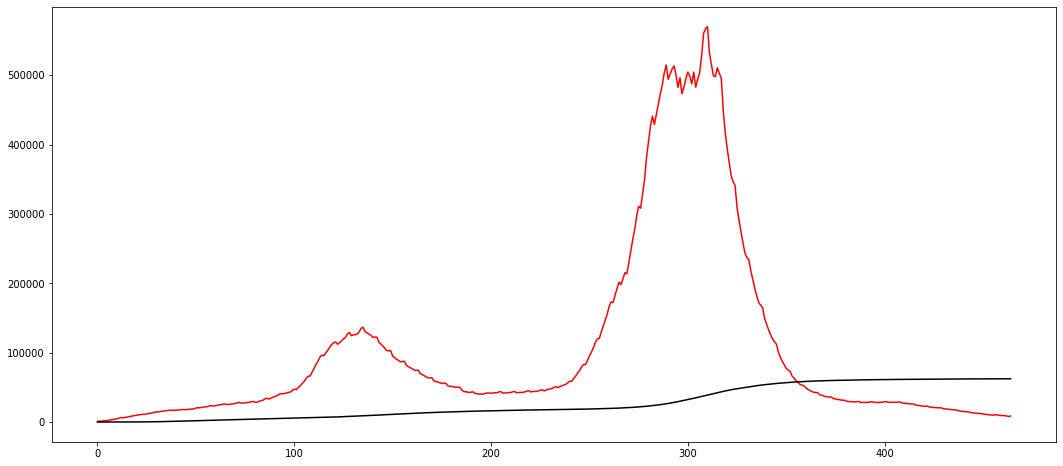

In [81]:
fig,ax = sird_fd.displayData(suscept, infect, recov, dead, graphVals=[0,1,0,1])

In [82]:
b1Range = (0, 5000)
b2Range = (0, 5)

betaVarsResol = [100, 5]

linVars, nonLinVars = sird_fd.solveAllVars(suscept, infect, recov, dead, [b1Range, b2Range], betaVarsResol, printOut=True)

Solution: 
b0:  0.04859904241496656
b1:  0.04223982160069706
g:   0.0818563787982533
nu:  0.0013258329826889089
b2:  50.0
b3:  5.0
cost:  627975.7093480884



In [83]:
sirdLinVars = sird.getLinVars(suscept, infect, recov, dead)

print("cost: ", sird.getError(suscept, infect, recov, dead, sirdLinVars))

cost:  744247.3342460621


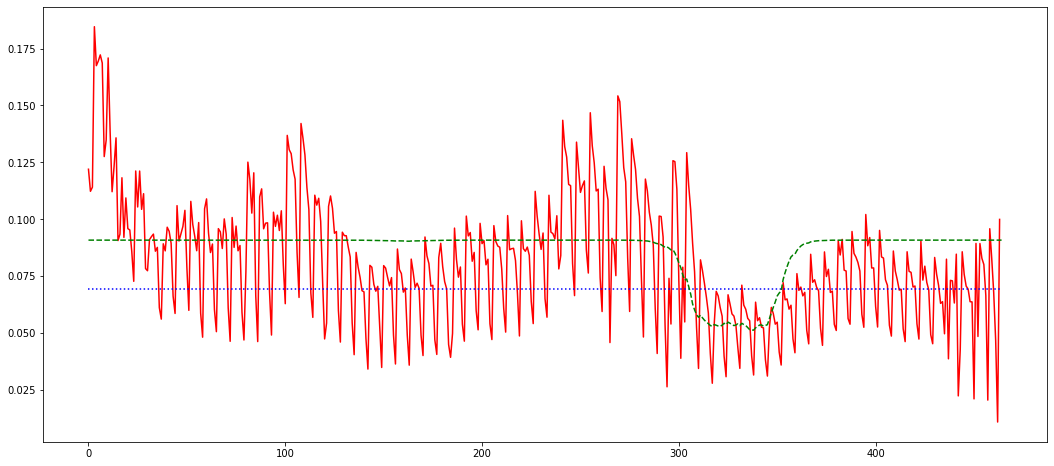

In [84]:
betaTime = sird_fd.getBetaTime(suscept, infect, recov, dead, linVars, nonLinVars)
linVarsTime = sird_time.getLinVars(suscept, infect, recov, dead)
linVarsConst = sird.getLinVars(suscept, infect, recov, dead)


fig, ax = plt.subplots(figsize=(18,8))
ax.plot(linVarsTime[:,0], color="red") #time varying beta
ax.plot(np.ones(len(linVarsTime[:,0]))*linVarsConst[0], color="blue", linestyle="dotted") #constant beta
ax.plot(betaTime, color="green", linestyle="dashed") #feedback beta

Lin Vars: [0.06938158907208551, 0.0818563787982533, 0.0013258329826889089]
Non Lin Vars: [50.0, 5.0]
Lin Vars: [0.04859904241496656, 0.04223982160069706, 0.0818563787982533, 0.0013258329826889089]
Lin Vars: [0.08327819822495593, 0.06631211704129582, 0.003115634798209661]


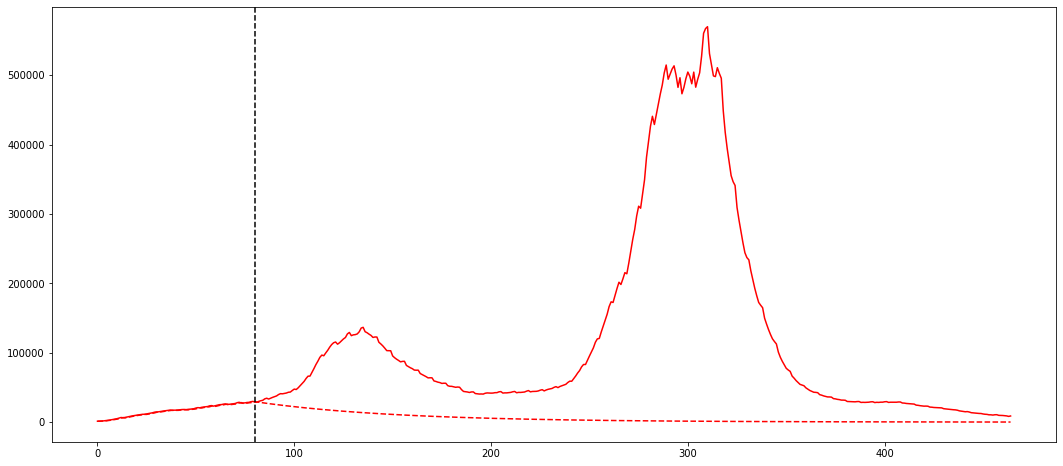

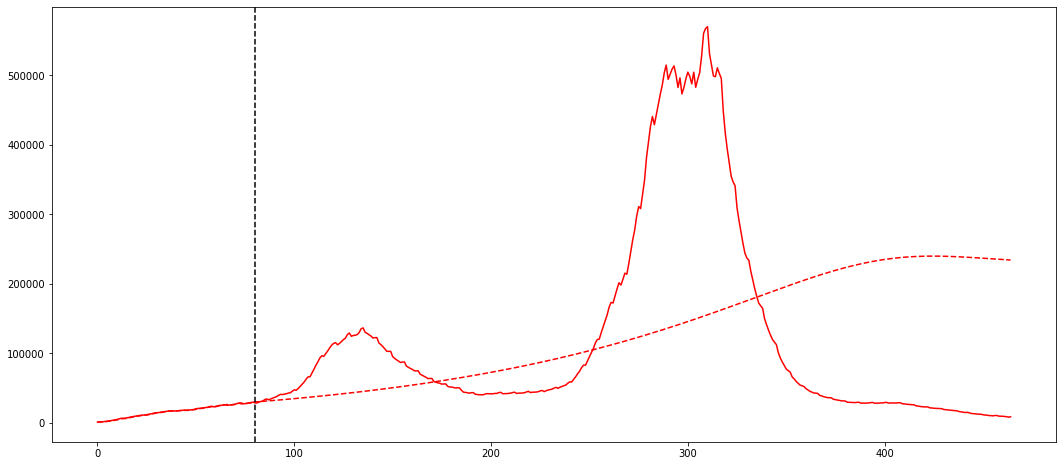

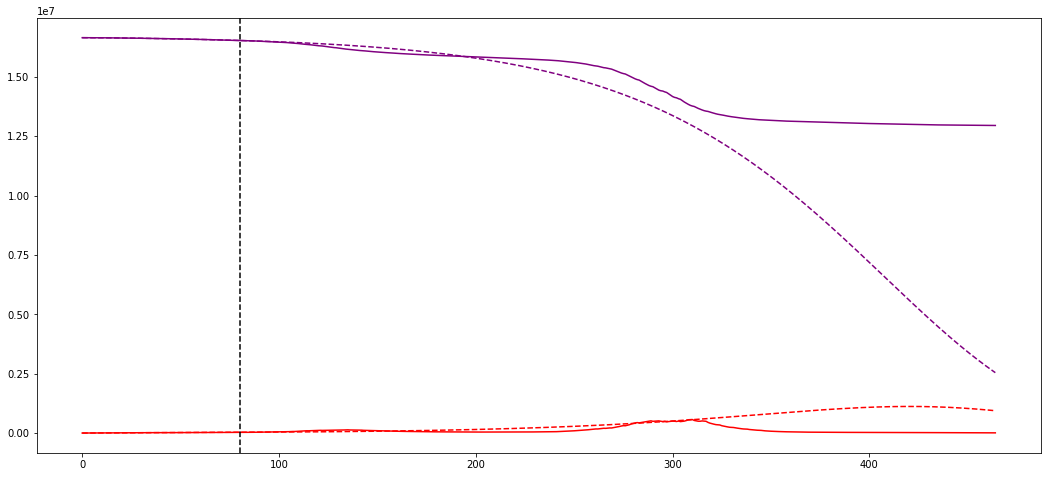

In [86]:
dTP= len(suscept) - 80


sird.predictMatch(suscept, infect, recov, dead, dTP, linVars=linVarsConst, graphVals=[0,1,0,0]);
sird_fd.predictMatch(suscept, infect, recov, dead, dTP, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,0,0]);
sird.predictMatch(suscept, infect, recov, dead, dTP, graphVals=[1,1,0,0]);

Lin Vars: [0.10138345557011105, 0.05783946585039205, 0.0007153556122274634]
Non Lin Vars: [50.0, 5.0]
Lin Vars: [0.04859904241496656, 0.04223982160069706, 0.0818563787982533, 0.0013258329826889089]
Non Lin Vars: [300.0, 10.0]
Lin Vars: [0.05081589859695359, 0.0662604135867909, 0.05783946585039205, 0.0007153556122274634]


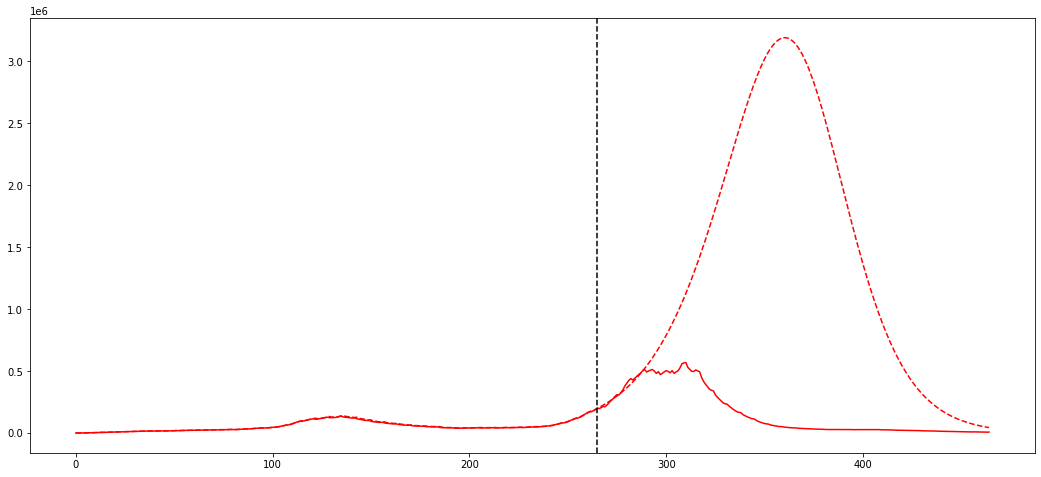

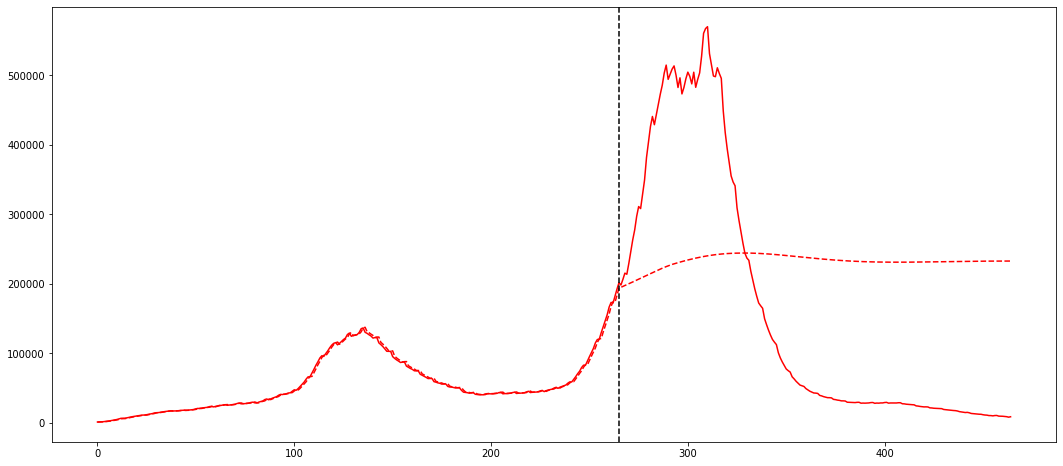

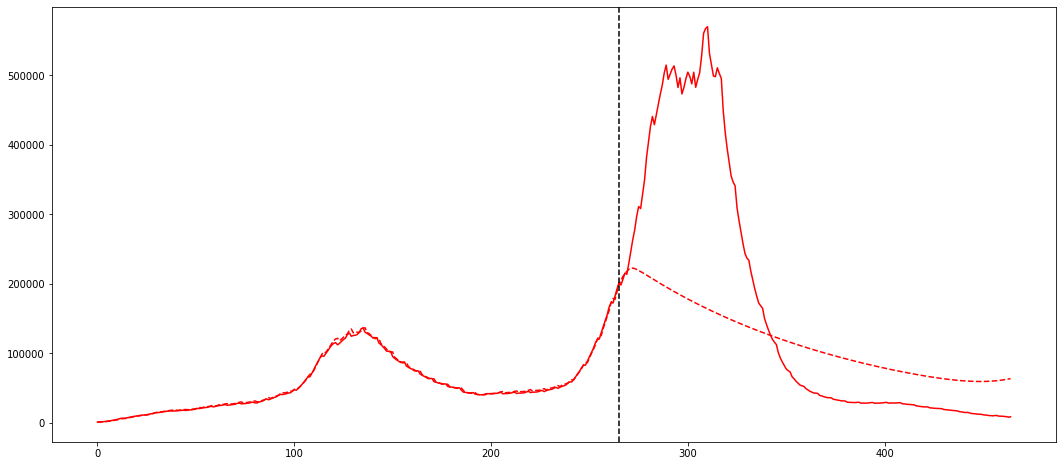

In [87]:
#daysToPredict = 180
sird.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);

#note using the nonLinVars is trained on the whole data includinig the predicted days
sird_fd.predictMatch(suscept, infect, recov, dead, daysToPredict, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,0,0]);

#only train nonLinVars on the non predicted days only
sp,ip,rp,dp, fig, ax = sird_fd.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);

## SAIRD Version

In [43]:
saird.weightDecay= .9
saird.regularizer=10

saird_fb.weightDecay = .97 #very small amount of decay
saird_fb.regularizer = 10
saird_fb.betaUseDecay = False

asymptDelay = 14

In [44]:
asymptRaw = saird.getAsympt(infectRaw, recovRaw, deadRaw, shift=asymptDelay)

asympt = asymptRaw[skipDays:numDays]

In [45]:
q = saird.getQ(asympt, infect, recov, dead, pop) #use non feedback model to get q value, should be accurate enough
print("q =", q)

#q=.011
suscept = saird.getSuscept(asympt, infect,recov,dead, q,pop)

q = 0.256150532


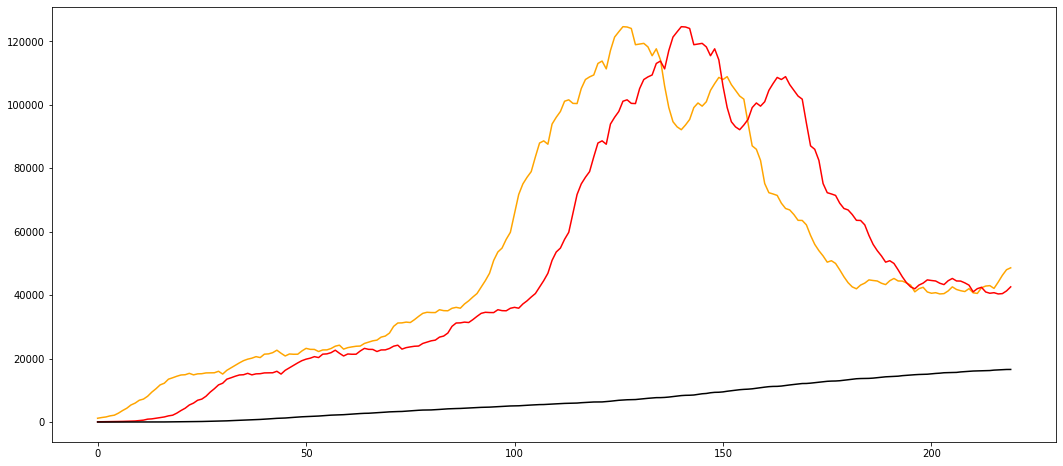

In [46]:
fig,ax = saird_fb.displayData(suscept, asympt, infect, recov, dead, graphVals=[0,1,1,0,1])

In [47]:
b1Range = (0, 5000)
b2Range = (0, 5)

betaVarsResol = [100, 15]

linVars, nonLinVars = saird_fb.solveAllVars(suscept, asympt, infect, recov, dead, [b1Range, b2Range], betaVarsResol, printOut=True)

Solution: 
b0:  0.07420219757393401
b1:  0.016764986940349322
k:   0.08256921177072786
g:   0.07937251293400677
nu:  0.0013926780866491497
b2:  200.0
b3:  4.999999999999999
cost:  1647105.5500564408



In [48]:
sairdLinVars = saird.getLinVars(suscept, asympt, infect, recov, dead)

print("cost: ", saird.getError(suscept, asympt, infect, recov, dead, sairdLinVars))

cost:  226859.7919622966


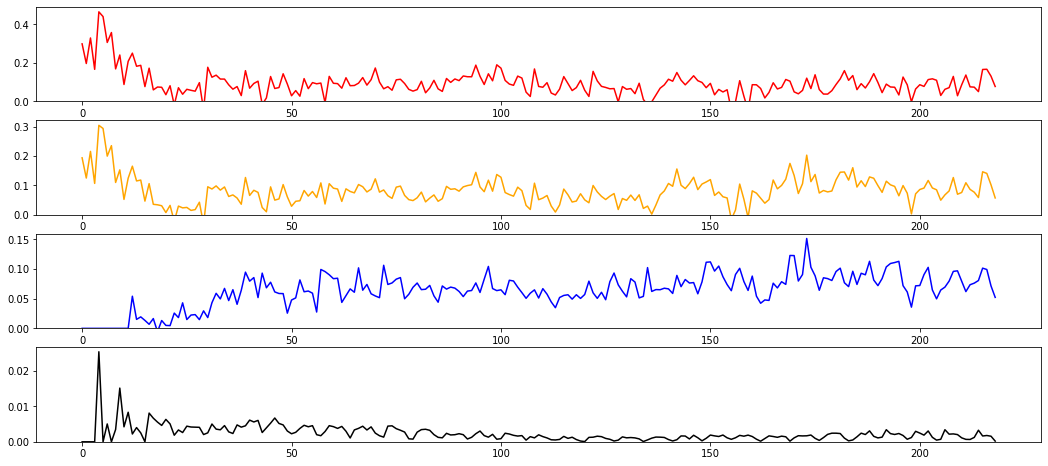

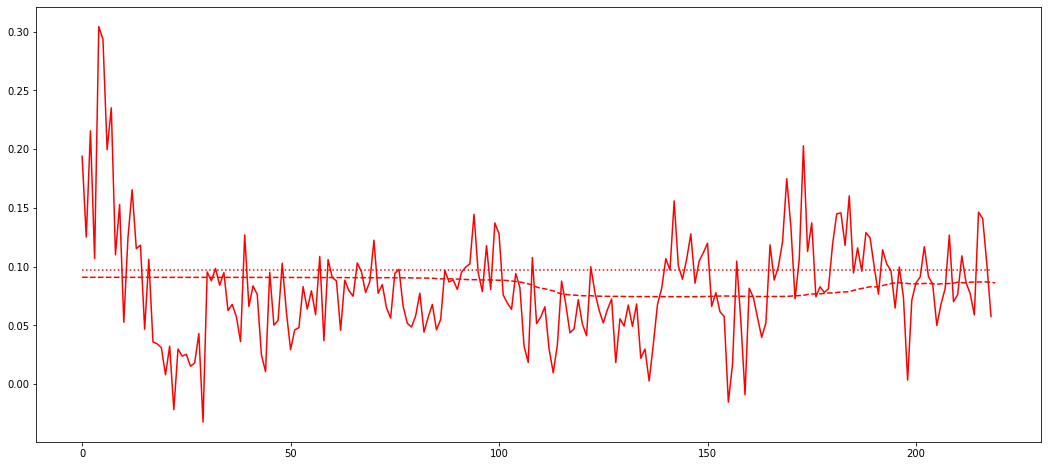

In [49]:
betaTime = saird_fb.getBetaTime(suscept, asympt, infect, recov, dead, linVars, nonLinVars)
linVarsTime, fig2, ax2 = saird_time.getLinVars(suscept, asympt, infect, recov, dead, graph=True)
linVarsConst = saird.getLinVars(suscept, asympt, infect, recov, dead)


fig, ax = plt.subplots(figsize=(18,8))
ax.plot(np.ones(len(linVarsTime[:,0]))*linVarsConst[0], color="red", linestyle="dotted") #constant beta
ax.plot(betaTime, color="red", linestyle="dashed") #feedback beta
ax.plot(linVarsTime[:,0], color="red") #time varying beta
#ax.plot(linVarsTime[:,1], color="orange") #compare with kappa

Lin Vars: [0.09728380111943746, 0.09201393689604012, 0.07886610139566934, 0.0015790657176304303]
Non Lin Vars: [200.0, 4.999999999999999]
Lin Vars: [0.07420219757393401, 0.016764986940349322, 0.08256921177072786, 0.07937251293400677, 0.0013926780866491497]


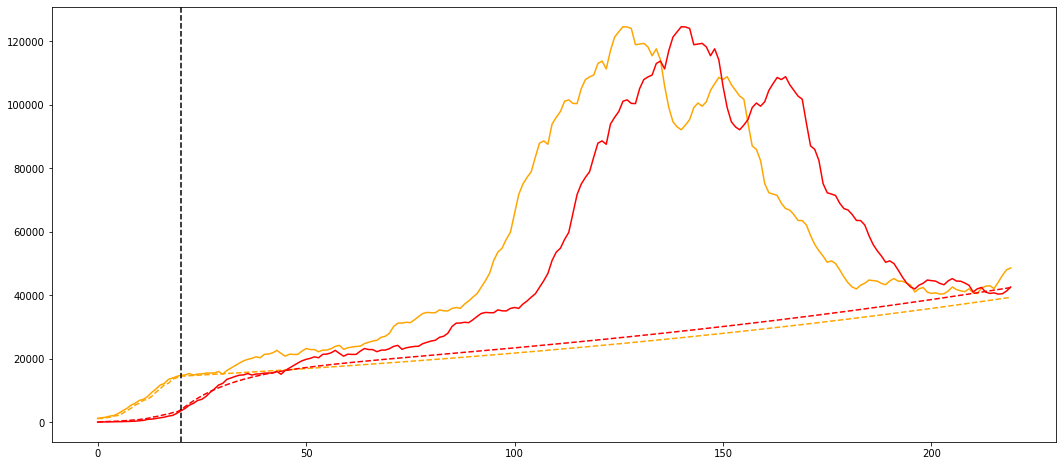

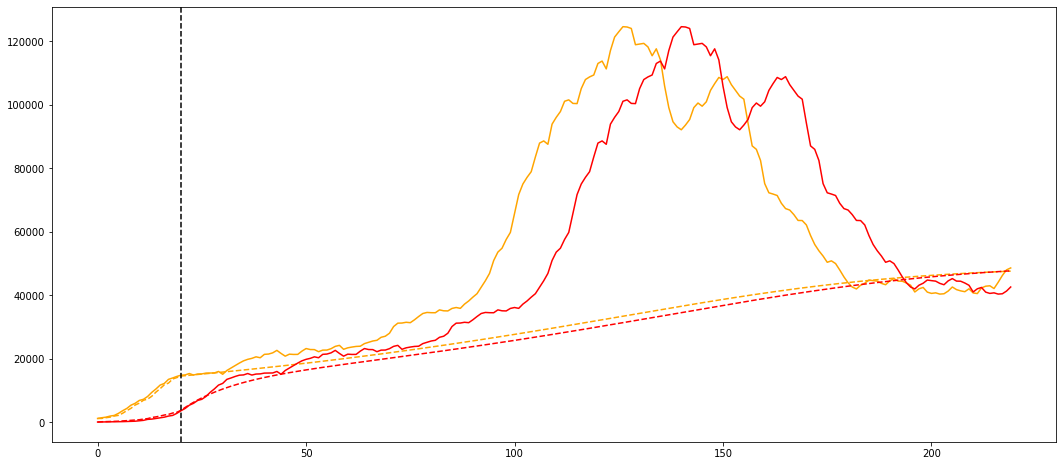

In [50]:
dTP= len(suscept) - 20


saird.predictMatch(suscept, asympt, infect, recov, dead, dTP, linVars=linVarsConst, graphVals=[0,1,1,0,0]);
saird_fb.predictMatch(suscept, asympt, infect, recov, dead, dTP, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,1,0,0]);

Lin Vars: [0.12393874824906695, 0.07432268539780958, 0.008219893886746595, 0.005302959469624936]
Non Lin Vars: [200.0, 4.999999999999999]
Lin Vars: [0.07420219757393401, 0.016764986940349322, 0.08256921177072786, 0.07937251293400677, 0.0013926780866491497]
Non Lin Vars: [150.0, 1.0]
Lin Vars: [-4.071911064639326, 4.258504921804528, 0.08276237711918198, 0.00930713007479483, 0.005168767756500215]


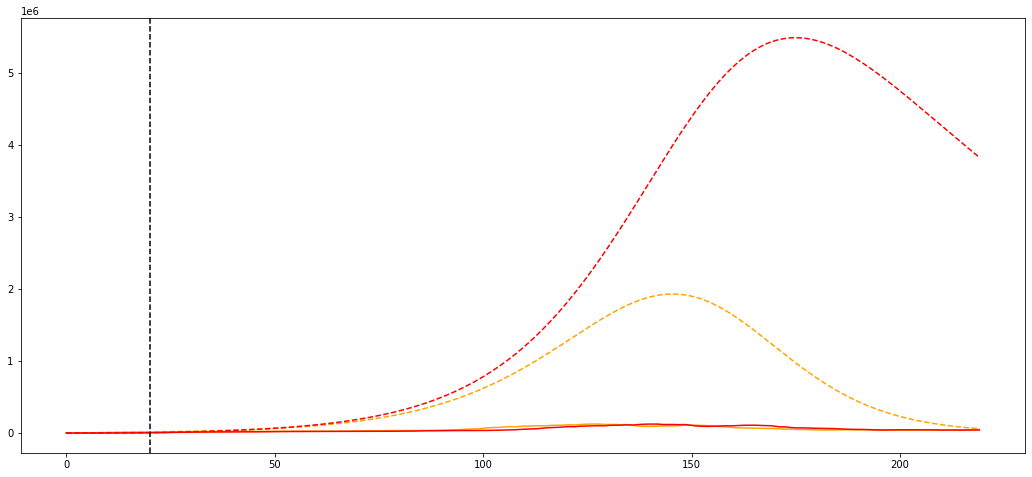

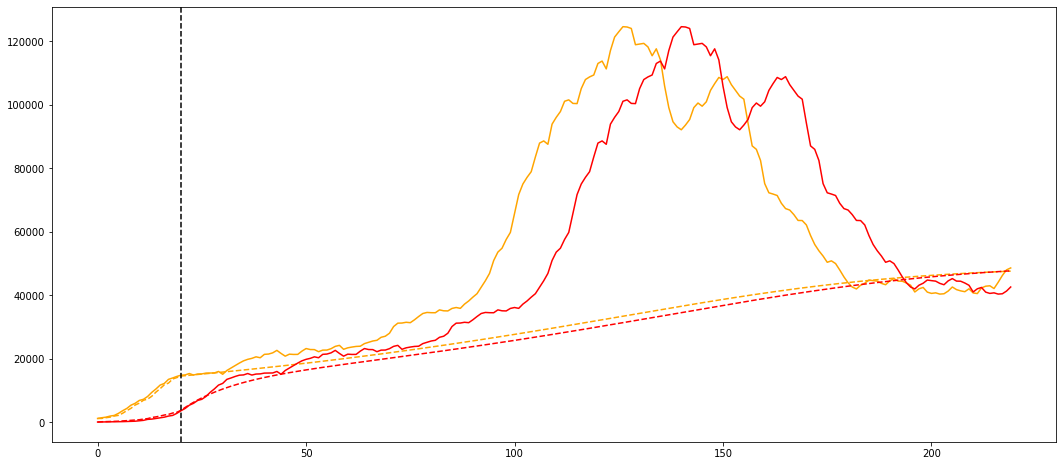

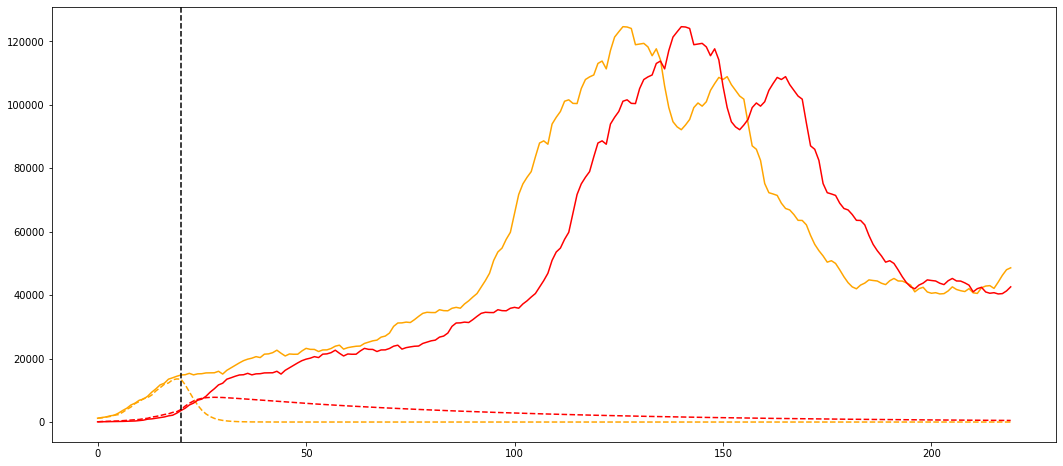

In [51]:
#daysToPredict = 180
saird.predictMatch(suscept, asympt, infect, recov, dead, daysToPredict, graphVals=[0,1,1,0,0]);

#note using the nonLinVars is trained on the whole data includinig the predicted days
saird_fb.predictMatch(suscept, asympt, infect, recov, dead, daysToPredict, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,1,0,0]);

#only train nonLinVars on the non predicted days only
saird_fb.predictMatch(suscept, asympt, infect, recov, dead, daysToPredict, graphVals=[0,1,1,0,0]);

In [24]:
def getFitError(I, IP):
    return sum((I - IP)**2) #squared error

Lin Vars: [0.2299063241139655, 0.02321733077466573, 0.016839658587661427]
Non Lin Vars: [1550.0, 0.3333333333333333]
Lin Vars: [-0.04551824535143164, 0.1947966309172764, 0.030023497085678866, 0.0031256514527479747]


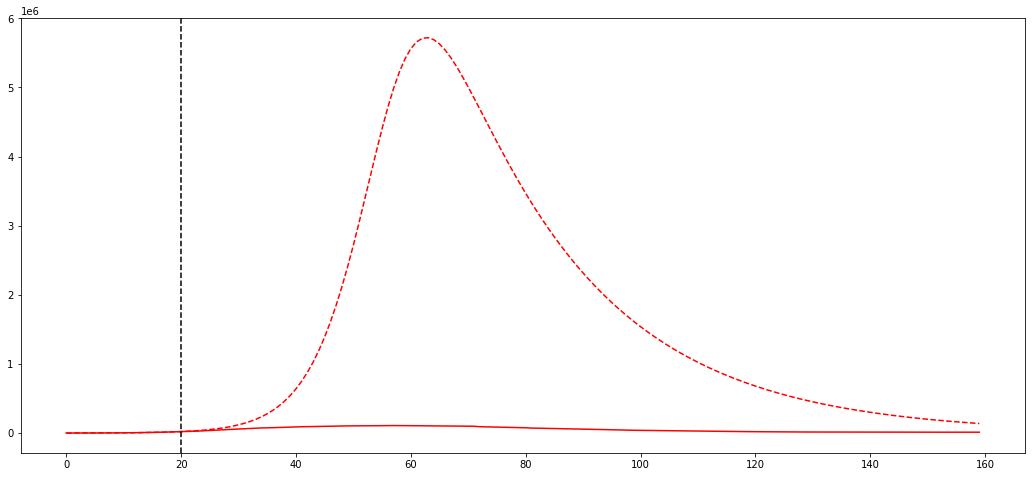

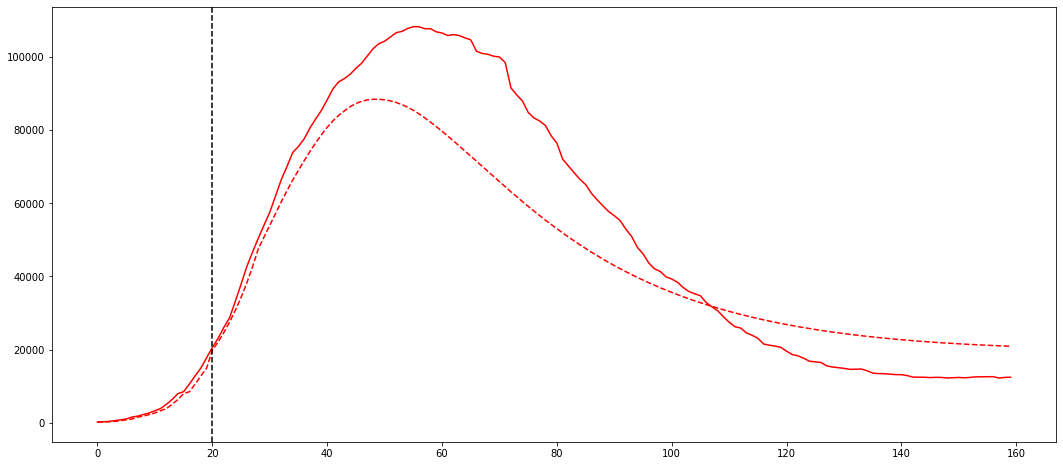

In [14]:
dTP= len(suscept) - 20

#linVarsConst = sird.getLinVars(suscept[:len(infect)-dTP], infect[:len(infect)-dTP], recov[:len(infect)-dTP], dead[:len(infect)-dTP])

sird.predictMatch(suscept, infect, recov, dead, dTP, linVars=linVarsConst, graphVals=[0,1,0,0]);
sird_fd.predictMatch(suscept, infect, recov, dead, dTP, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,0,0]);

Non Lin Vars: [200.0, 2.333333333333333]
Lin Vars: [0.05563329431957166, 0.059996200621812566, 0.07937251293400677, 0.0013926780866491497]
1 497638218408.21484
Non Lin Vars: [200.0, 2.333333333333333]
Lin Vars: [0.05563329431957166, 0.059996200621812566, 0.07937251293400677, 0.0013926780866491497]
2 335206361351.9329
Non Lin Vars: [200.0, 2.333333333333333]
Lin Vars: [0.05563329431957166, 0.059996200621812566, 0.07937251293400677, 0.0013926780866491497]
3 229051480339.27975
Non Lin Vars: [200.0, 2.333333333333333]
Lin Vars: [0.05563329431957166, 0.059996200621812566, 0.07937251293400677, 0.0013926780866491497]
4 161210072272.92212
Non Lin Vars: [200.0, 2.333333333333333]
Lin Vars: [0.05563329431957166, 0.059996200621812566, 0.07937251293400677, 0.0013926780866491497]
5 117506165341.78767
Non Lin Vars: [200.0, 2.333333333333333]
Lin Vars: [0.05563329431957166, 0.059996200621812566, 0.07937251293400677, 0.0013926780866491497]
6 89459571255.94002
Non Lin Vars: [200.0, 2.333333333333333]
L

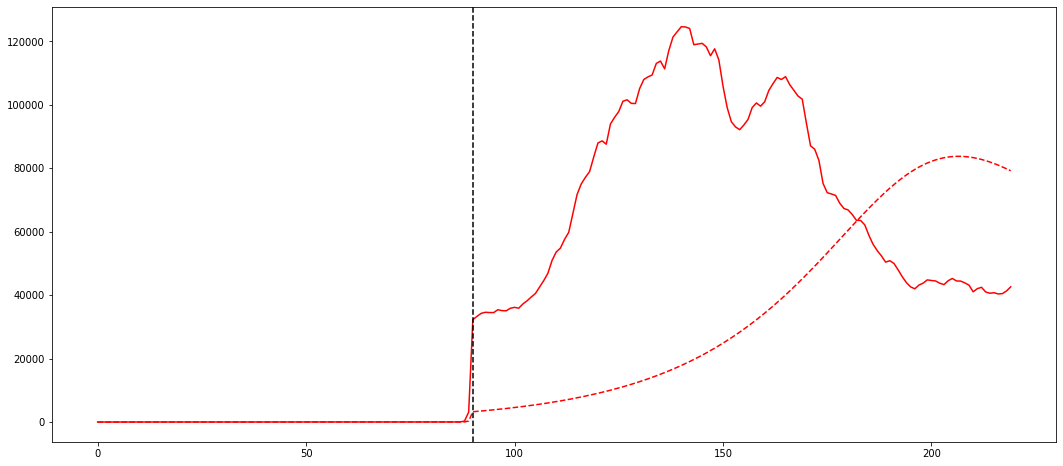

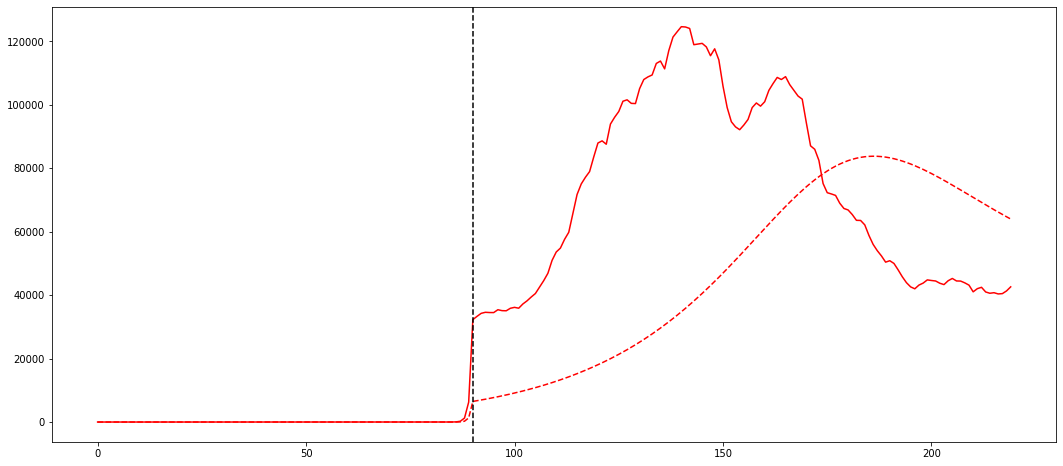

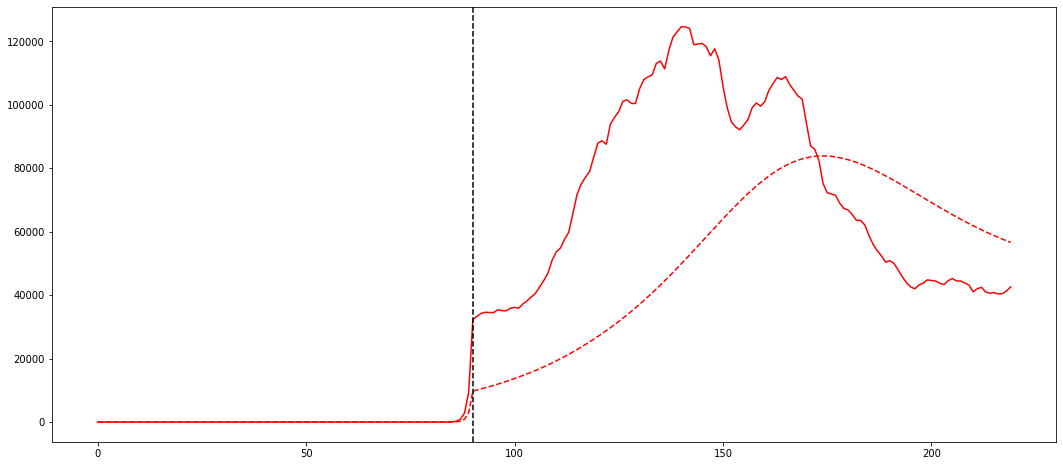

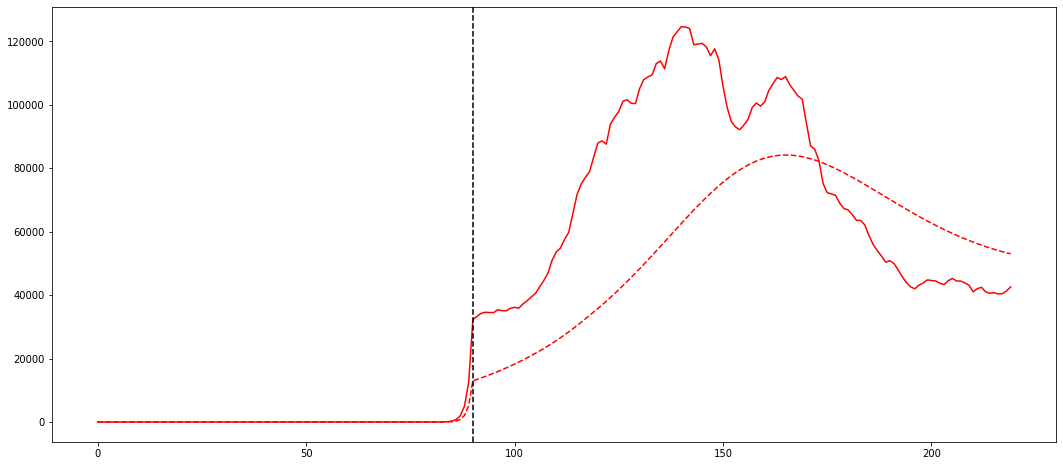

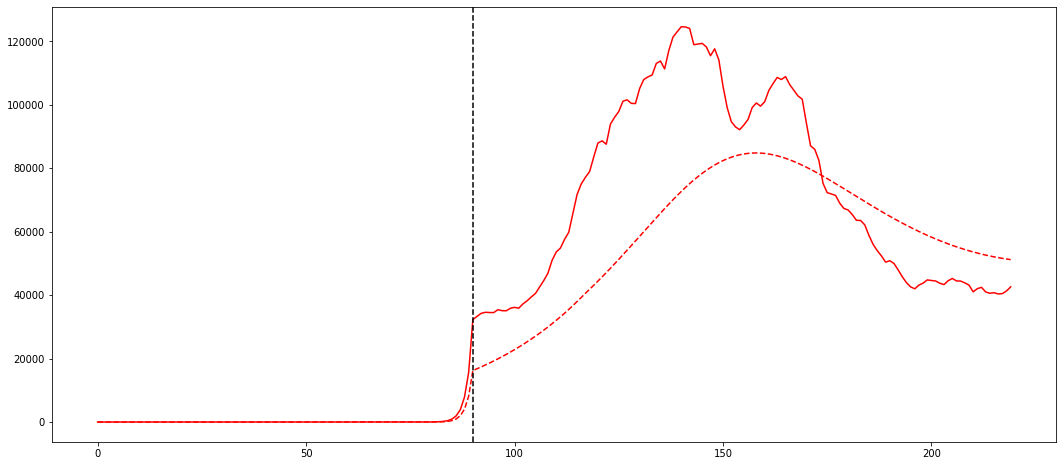

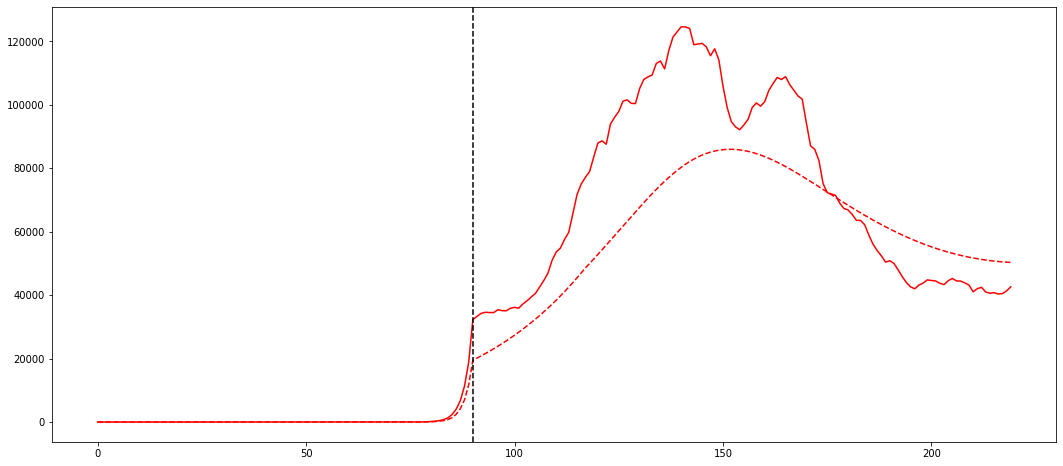

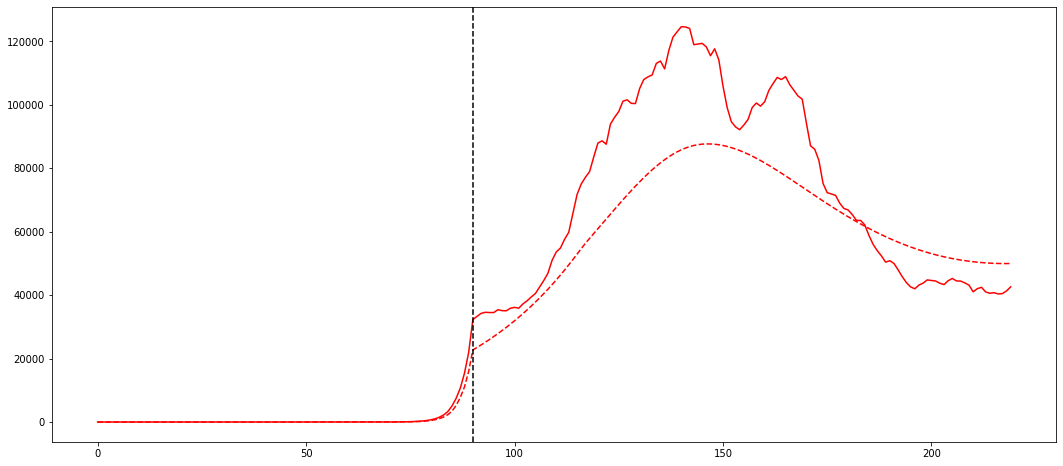

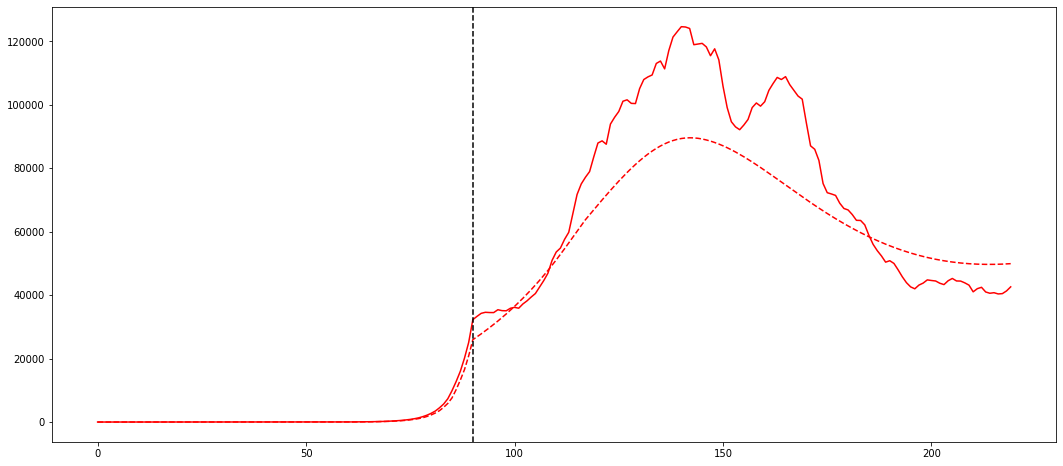

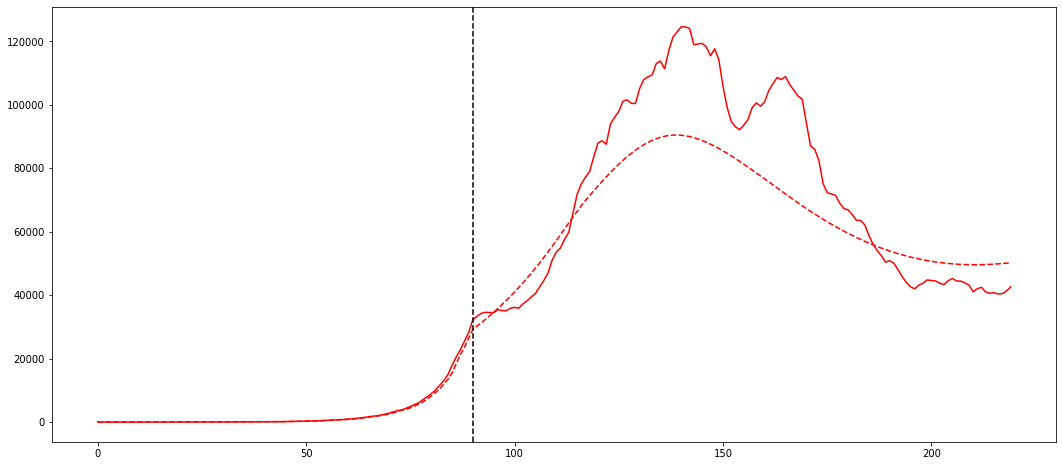

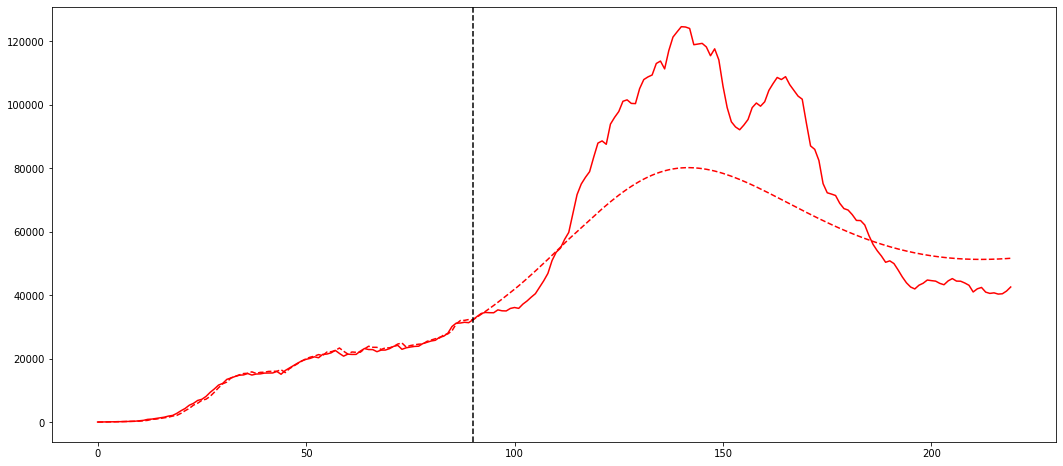

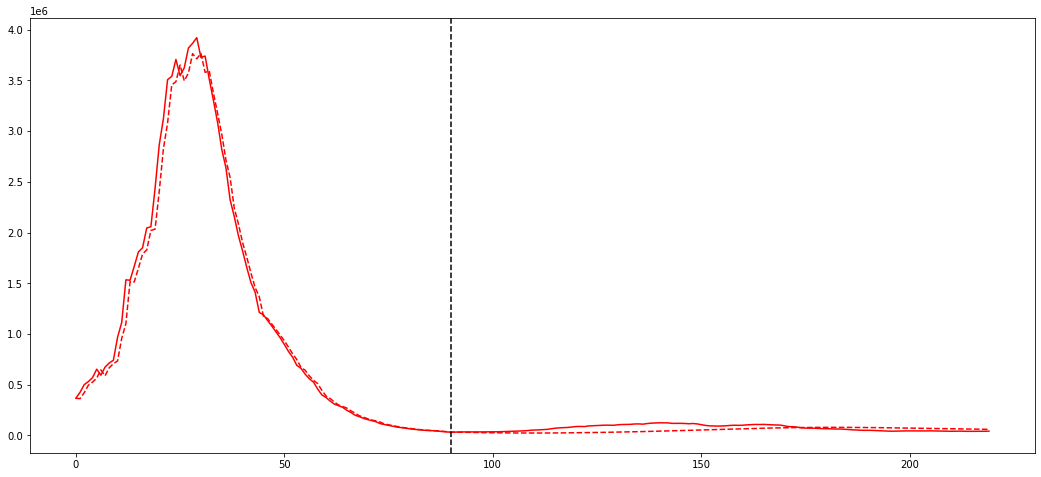

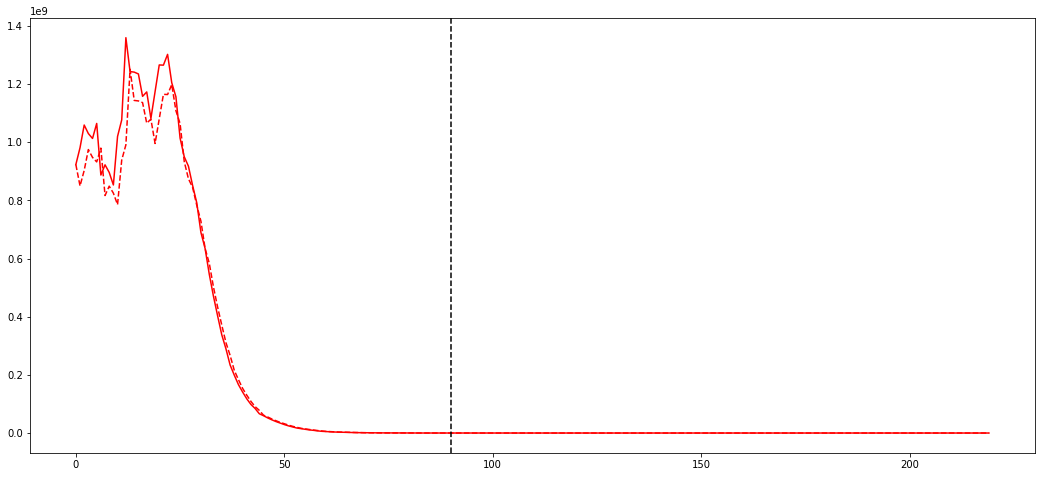

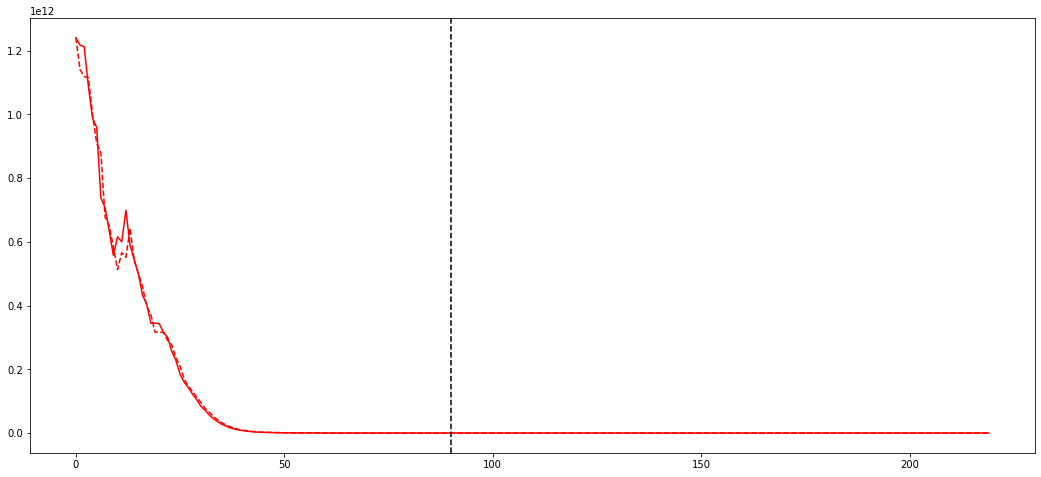

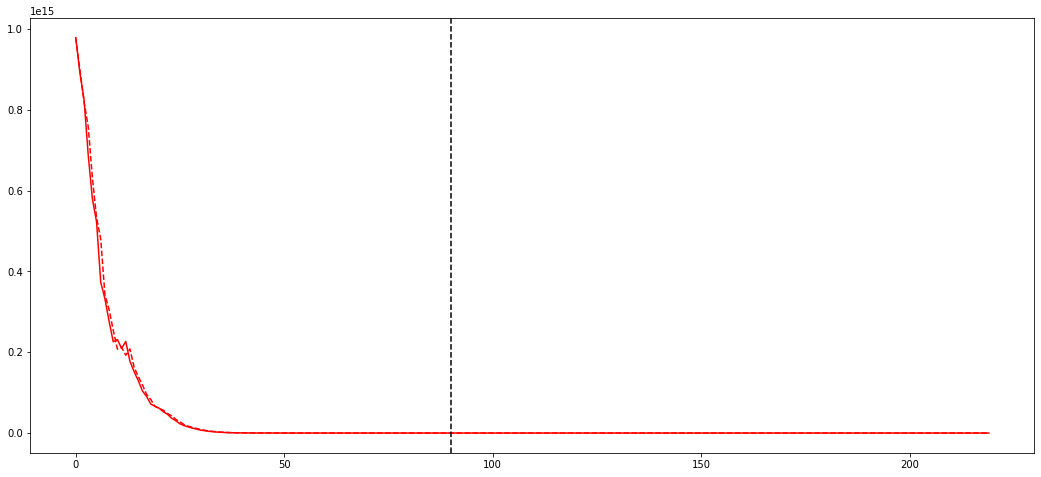

In [31]:
minError = 1e100 #let this be an enormous error
minVal = 0

for i in range(1,15):
    infectTest = infect.copy()
    for j in range(0,len(suscept)-dTP+1):
        infectTest[j] = infectTest[j] * (i/10)**(len(suscept)-dTP - j)
    sp,ip,rp,dp, fig, ax = sird_fd.predictMatch(suscept, infectTest, recov, dead, dTP, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,0,0])
    
    currError = getFitError(infect, ip)
    
    if(currError < minError):
        minError = currError
        minVal = i
    
    print(i, getFitError(infect, ip))
    
print("min: ", minVal, minError)

Non Lin Vars: [200.0, 2.333333333333333]
Lin Vars: [0.05563329431957166, 0.059996200621812566, 0.07937251293400677, 0.0013926780866491497]


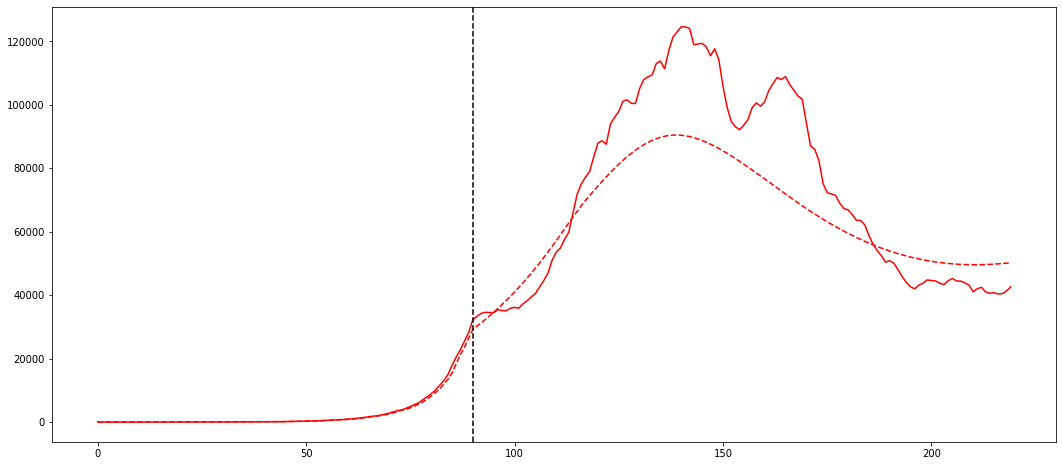

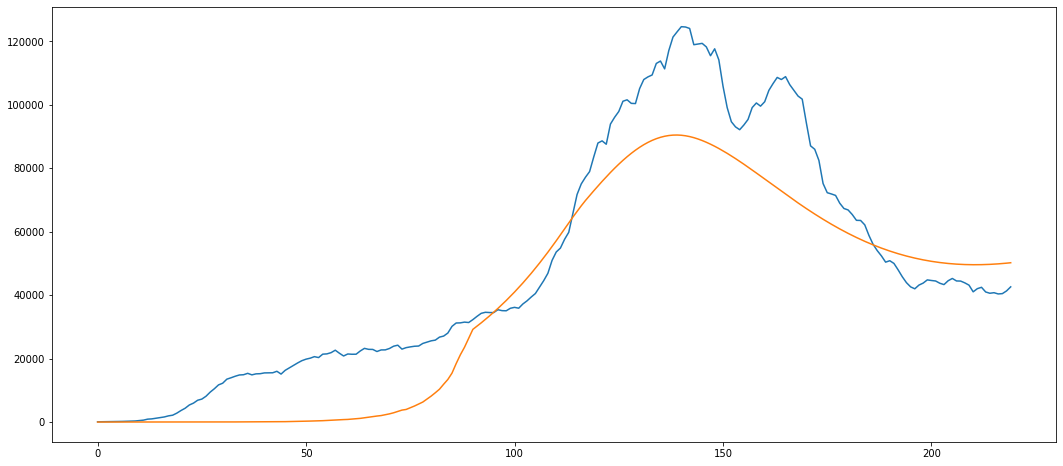

In [32]:
for j in range(0,len(suscept)-dTP+1):
    infectTest[j] = infect[j] * (minVal/10)**(len(suscept)-dTP - j)
sp,ip,rp,dp, fig, ax = sird_fd.predictMatch(suscept, infectTest, recov, dead, dTP, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,0,0])

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(infect)
ax.plot(ip)